In [ ]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}"')

Saving animal_classification.zip to animal_classification.zip
User uploaded file "animal_classification.zip"


In [ ]:
import zipfile

zip_file_name = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
  zip_ref.extractall('Animal_Classifier')

In [ ]:
import os
from collections import Counter

data_dir = '/content/Animal_Classifier/Animal Classification/dataset' # Point to the directory containing class folders
classes = os.listdir(data_dir)
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
print(class_counts)

{'Dolphin': 129, 'Elephant': 133, 'Giraffe': 129, 'Cow': 131, 'Dog': 122, 'Kangaroo': 126, 'Panda': 135, 'Bird': 137, 'Horse': 130, 'Tiger': 129, 'Deer': 127, 'Bear': 125, 'Zebra': 137, 'Cat': 123, 'Lion': 131}


In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor

train_data=datasets.FashionMNIST(root="Animal_Classifier/data/raw",
                                 train=True,
                                 download=True,
                                 transform=transforms.ToTensor(),
                                 target_transform=None)
test_data=datasets.FashionMNIST(
    root="Animal_Classifier/data/raw",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [ ]:
import os

data_dir_dataset = '/content/Animal_Classifier/Animal Classification/dataset'
print(os.listdir(data_dir_dataset))

['Dolphin', 'Elephant', 'Giraffe', 'Cow', 'Dog', 'Kangaroo', 'Panda', 'Bird', 'Horse', 'Tiger', 'Deer', 'Bear', 'Zebra', 'Cat', 'Lion']


In [ ]:
from torch.utils.data import random_split

train_size = int(0.7 * len(animal_dataset))
val_size = int(0.15 * len(animal_dataset))
test_size = len(animal_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(animal_dataset, [train_size, val_size, test_size])

print(f"Training dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Testing dataset size: {len(test_dataset)}")

Training dataset size: 1360
Validation dataset size: 291
Testing dataset size: 293


In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import Compose, Resize, ToTensor


transform = Compose([
    Resize((64, 64)),
    ToTensor()
])


animal_dataset = ImageFolder(root=data_dir_dataset, transform=transform)

print(f"Total number of images in the dataset: {len(animal_dataset)}")

Total number of images in the dataset: 1944


In [ ]:
from torch.utils.data import DataLoader

batch_size = 32

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of batches in train_dataloader: {len(train_dataloader)}")
print(f"Number of batches in val_dataloader: {len(val_dataloader)}")
print(f"Number of batches in test_dataloader: {len(test_dataloader)}")

Number of batches in train_dataloader: 43
Number of batches in val_dataloader: 10
Number of batches in test_dataloader: 10


In [ ]:
train_images, train_labels = next(iter(train_dataloader))
print(f"Train batch image shape: {train_images.shape}")
print(f"Train batch label shape: {train_labels.shape}")


val_images, val_labels = next(iter(val_dataloader))
print(f"Validation batch image shape: {val_images.shape}")
print(f"Validation batch label shape: {val_labels.shape}")


test_images, test_labels = next(iter(test_dataloader))
print(f"Test batch image shape: {test_images.shape}")
print(f"Test batch label shape: {test_labels.shape}")

Train batch image shape: torch.Size([32, 3, 64, 64])
Train batch label shape: torch.Size([32])
Validation batch image shape: torch.Size([32, 3, 64, 64])
Validation batch label shape: torch.Size([32])
Test batch image shape: torch.Size([32, 3, 64, 64])
Test batch label shape: torch.Size([32])


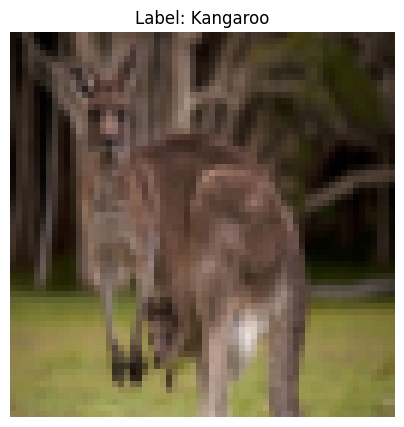

In [ ]:
import matplotlib.pyplot as plt
import random
import torch

plt.figure(figsize=(5, 5))
random.seed(42)
random_index = random.randint(0, len(animal_dataset) - 1)
image, label = animal_dataset[random_index]

if isinstance(image, torch.Tensor):
    image = image.permute(1, 2, 0).numpy()
plt.imshow(image.squeeze(), cmap='gray')
if animal_dataset.classes and label < len(animal_dataset.classes):
    plt.title(f"Label: {animal_dataset.classes[label]}")
else:
    plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

In [ ]:
import os

file_to_remove = '/content/sample_data/anscombe.json'

if os.path.exists(file_to_remove):
    os.remove(file_to_remove)
    print(f"Removed file: {file_to_remove}")
else:
    print(f"File not found: {file_to_remove}")

File not found: /content/sample_data/anscombe.json


In [ ]:
import os

file_to_remove = '/content/sample_data/README.md'

if os.path.exists(file_to_remove):
    os.remove(file_to_remove)
    print(f"Removed file: {file_to_remove}")
else:
    print(f"File not found: {file_to_remove}")

File not found: /content/sample_data/README.md


In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor

train_data=datasets.FashionMNIST(root="Animal_Classifier/data/raw",
                                 train=True,
                                 download=True,
                                 transform=transforms.ToTensor(),
                                 target_transform=None)
test_data=datasets.FashionMNIST(
    root="Animal_Classifier/data/raw",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

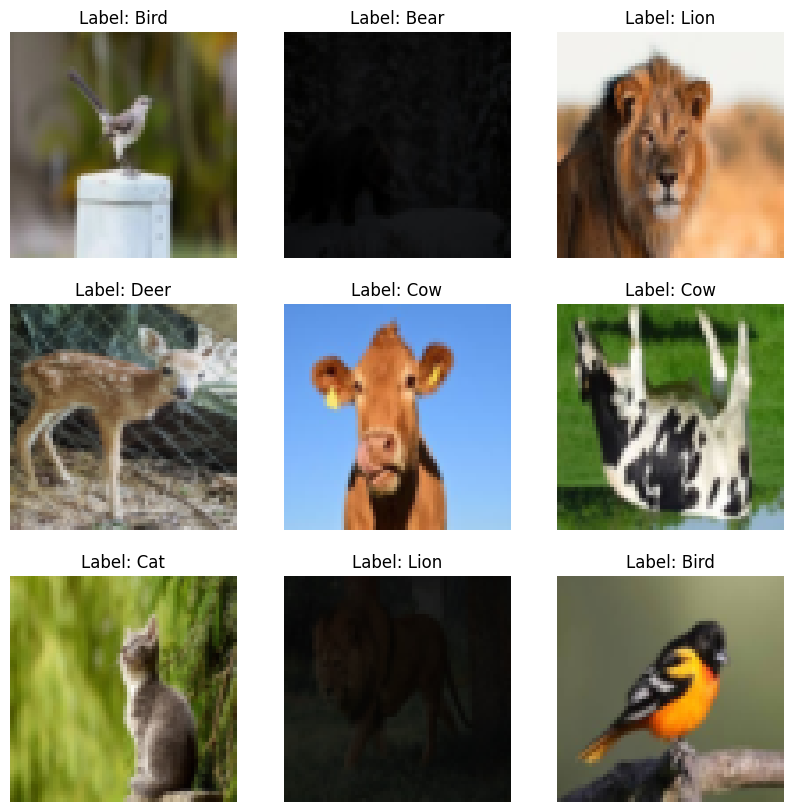

In [ ]:


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    random_index = random.randint(0, len(animal_dataset) - 1)
    image, label = animal_dataset[random_index]

    if isinstance(image, torch.Tensor):
        image = image.permute(1, 2, 0).numpy()

    plt.imshow(image.squeeze(), cmap='gray')
    if animal_dataset.classes and label < len(animal_dataset.classes):
        plt.title(f"Label: {animal_dataset.classes[label]}")
    else:
        plt.title(f"Label: {label}")
    plt.axis('off')
plt.show()

### Visualizing Sample Images

This section displays sample images from the dataset along with their corresponding labels. This visual inspection helps to understand the nature of the data and the accuracy of the labels.

In [ ]:
import os

data_dir_dataset = '/content/Animal_Classifier/Animal Classification/dataset'
print(os.listdir(data_dir_dataset))

['Dolphin', 'Elephant', 'Giraffe', 'Cow', 'Dog', 'Kangaroo', 'Panda', 'Bird', 'Horse', 'Tiger', 'Deer', 'Bear', 'Zebra', 'Cat', 'Lion']


In [ ]:
from torch.utils.data import DataLoader

batch_size = 32

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of batches in train_dataloader: {len(train_dataloader)}")
print(f"Number of batches in val_dataloader: {len(val_dataloader)}")
print(f"Number of batches in test_dataloader: {len(test_dataloader)}")

Number of batches in train_dataloader: 43
Number of batches in val_dataloader: 10
Number of batches in test_dataloader: 10


In [ ]:
train_images, train_labels = next(iter(train_dataloader))
print(f"Train batch image shape: {train_images.shape}")
print(f"Train batch label shape: {train_labels.shape}")


val_images, val_labels = next(iter(val_dataloader))
print(f"Validation batch image shape: {val_images.shape}")
print(f"Validation batch label shape: {val_labels.shape}")


test_images, test_labels = next(iter(test_dataloader))
print(f"Test batch image shape: {test_images.shape}")
print(f"Test batch label shape: {test_labels.shape}")

Train batch image shape: torch.Size([32, 3, 64, 64])
Train batch label shape: torch.Size([32])
Validation batch image shape: torch.Size([32, 3, 64, 64])
Validation batch label shape: torch.Size([32])
Test batch image shape: torch.Size([32, 3, 64, 64])
Test batch label shape: torch.Size([32])


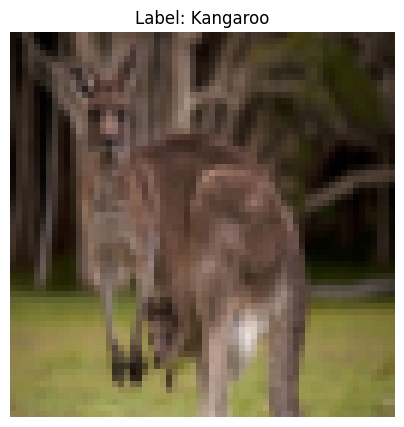

In [ ]:
import matplotlib.pyplot as plt
import random
import torch

plt.figure(figsize=(5, 5))
random.seed(42)
random_index = random.randint(0, len(animal_dataset) - 1)
image, label = animal_dataset[random_index]

if isinstance(image, torch.Tensor):
    image = image.permute(1, 2, 0).numpy()
plt.imshow(image.squeeze(), cmap='gray')
if animal_dataset.classes and label < len(animal_dataset.classes):
    plt.title(f"Label: {animal_dataset.classes[label]}")
else:
    plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

In [ ]:
import os

data_path = '/content/Animal_Classifier/Animal Classification/dataset'
for folder in os.listdir(data_path):
    print(folder)


Dolphin
Elephant
Giraffe
Cow
Dog
Kangaroo
Panda
Bird
Horse
Tiger
Deer
Bear
Zebra
Cat
Lion


In [ ]:
print("Folders after cleanup:")
print(os.listdir(data_path))


Folders after cleanup:
['Dolphin', 'Elephant', 'Giraffe', 'Cow', 'Dog', 'Kangaroo', 'Panda', 'Bird', 'Horse', 'Tiger', 'Deer', 'Bear', 'Zebra', 'Cat', 'Lion']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


### Setting up TensorFlow Data Generators

This code uses TensorFlow's `ImageDataGenerator` to create data generators for training and validation. It includes data augmentation techniques to artificially increase the size of the training dataset and improve the model's generalization. The images are also rescaled.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
    validation_split=0.2
)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


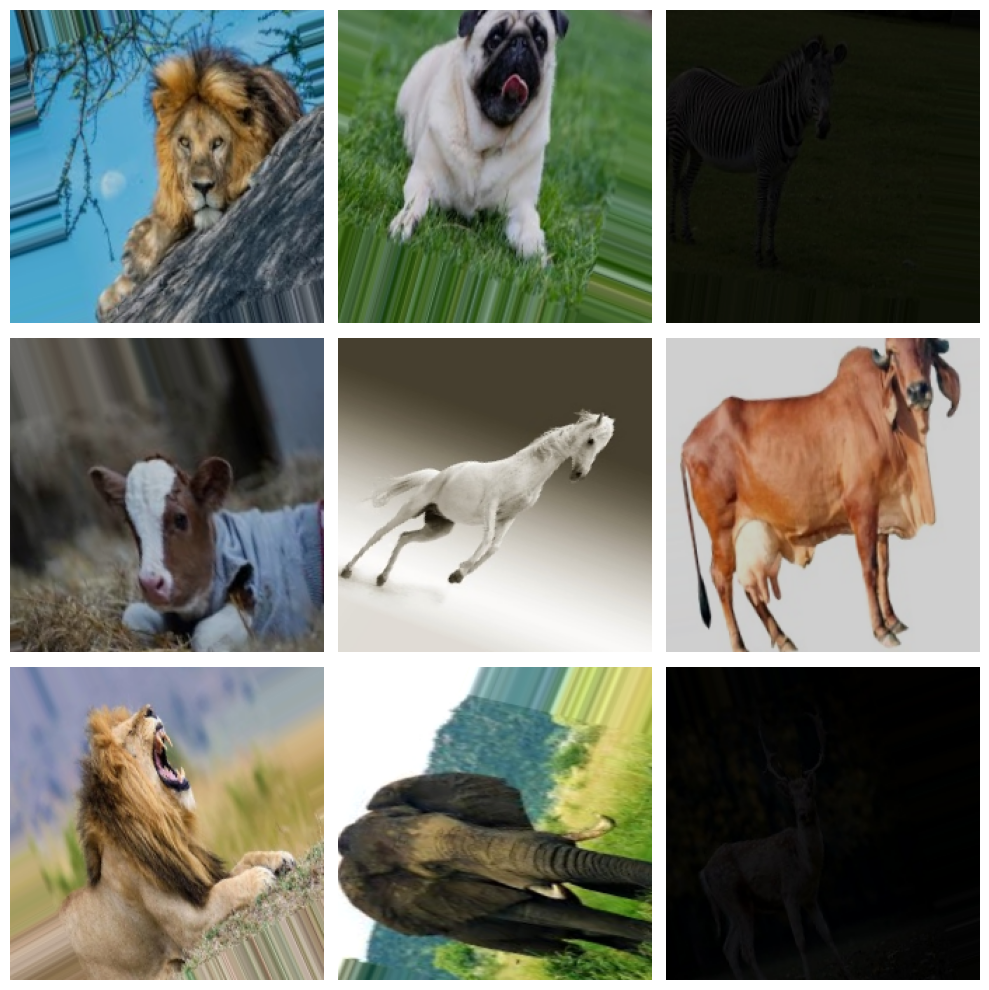

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


images, labels = next(train_generator)


plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


### Visualizing Augmented Images

This section displays a batch of images from the training data generator after applying the data augmentation transformations. This helps visualize the effects of the augmentation techniques on the images.

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 640ms/step - accuracy: 0.8501 - loss: 0.4728 - val_accuracy: 0.8903 - val_loss: 0.3845
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 625ms/step - accuracy: 0.8934 - loss: 0.4040 - val_accuracy: 0.9112 - val_loss: 0.3353
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 727ms/step - accuracy: 0.8907 - loss: 0.4100 - val_accuracy: 0.8982 - val_loss: 0.3259
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 612ms/step - accuracy: 0.9195 - loss: 0.3489 - val_accuracy: 0.8956 - val_loss: 0.3377
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 613ms/step - accuracy: 0.9000 - loss: 0.3551 - val_accuracy: 0.9034 - val_loss: 0.2944
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 722ms/step - accuracy: 0.9090 - loss: 0.3409 - val_accuracy: 0.9034 - val_loss: 0.2828
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 613ms/step - accuracy: 0.9191 - loss: 0.3212 - val_accuracy: 0.9138 - val_loss: 0.2856
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 617ms/step - accuracy: 0.9156 - loss: 0.3158 - val_accu

In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.9120 - loss: 0.2541
Validation Loss: 0.25945305824279785
Validation Accuracy: 0.9060052037239075


### Evaluating the Model

This section evaluates the trained model's performance on the validation dataset and prints the validation loss and accuracy.

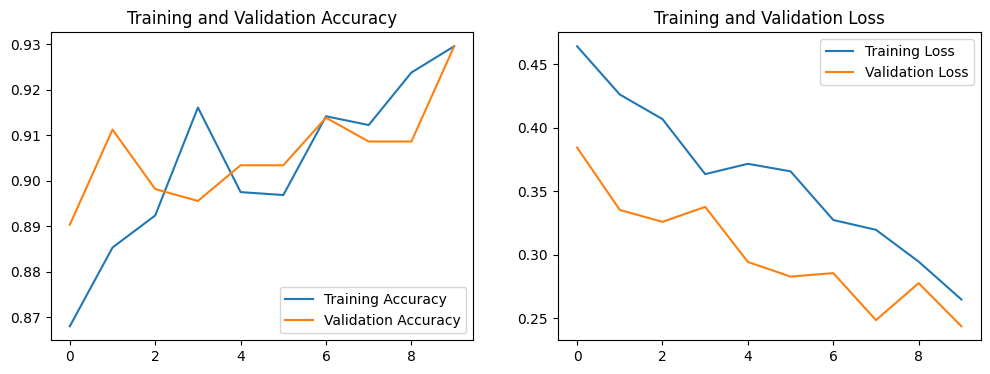

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,895 (42.61 MB)

 Trainable params: 11,170,895 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam


In [ ]:
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')


base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

This code defines and compiles a deep learning model for image classification using transfer learning with the pre-trained MobileNetV2 model. The pre-trained model's convolutional base is used, and new dense layers are added on top for classification. The model is compiled with the Adam optimizer and categorical crossentropy loss.

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
base_model.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


fine_tune_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)


Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.8249 - loss: 0.6753 - val_accuracy: 0.8616 - val_loss: 0.4620
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 35s 717ms/step - accuracy: 0.8361 - loss: 0.6029 - val_accuracy: 0.8721 - val_loss: 0.4345
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 613ms/step - accuracy: 0.8421 - loss: 0.5813 - val_accuracy: 0.8825 - val_loss: 0.3908
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 619ms/step - accuracy: 0.8417 - loss: 0.5269 - val_accuracy: 0.9034 - val_loss: 0.3713
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 654ms/step - accuracy: 0.8691 - loss: 0.4631 - val_accuracy: 0.8930 - val_loss: 0.3603


### Fine-tuning the Model

This section fine-tunes the entire model (including the pre-trained base) with a lower learning rate. This allows the model to learn more specific features from the animal dataset.

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.6, 1.4],
    fill_mode='nearest',
    validation_split=0.2
)


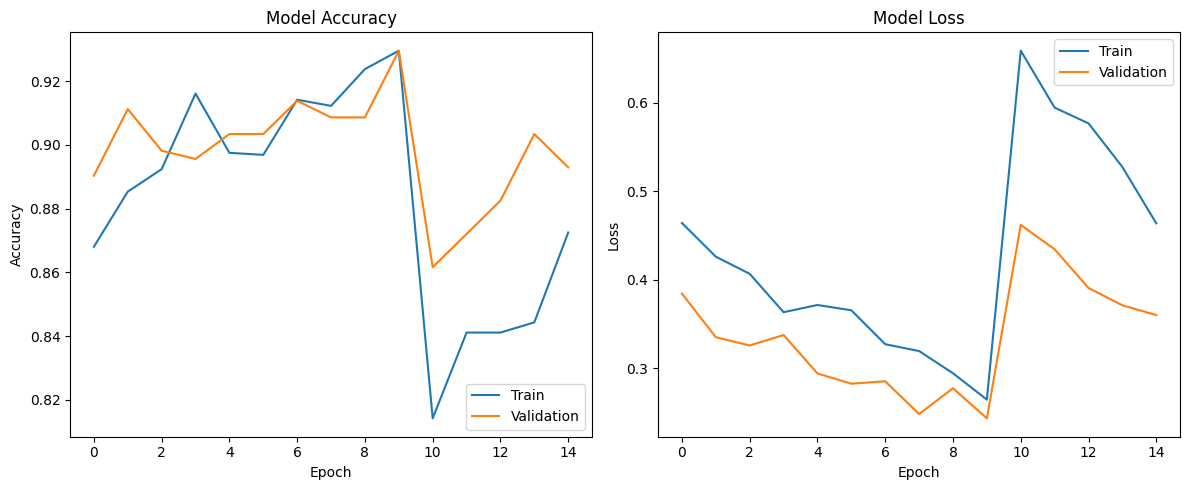

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'])
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'] + fine_tune_history.history['loss'])
plt.plot(history.history['val_loss'] + fine_tune_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
model.save('animal_classifier_model.h5')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

drive_path = '/content/drive/My Drive/'
dataset_folder_name = 'Animal_Classifier_Dataset'
new_dataset_dir = os.path.join(drive_path, dataset_folder_name)

os.makedirs(new_dataset_dir, exist_ok=True)

print(f"Created dataset directory in Google Drive: {new_dataset_dir}")

Created dataset directory in Google Drive: /content/drive/My Drive/Animal_Classifier_Dataset


In [ ]:
import os


drive_dataset_path = '/content/drive/My Drive/Animal_Classifier_Dataset'


model_filename = 'animal_classifier_model.keras'


drive_model_path = os.path.join(drive_dataset_path, model_filename)

try:
    model.save(drive_model_path)
    print(f"Model successfully saved to Google Drive at: {drive_model_path}")
except Exception as e:
    print(f"Error saving the model to Google Drive: {e}")

Model successfully saved to Google Drive at: /content/drive/My Drive/Animal_Classifier_Dataset/animal_classifier_model.keras


### Saving the Trained Model to Google Drive

This code saves the trained model to a specified directory in Google Drive. This allows for persistent storage of the model and its future use without retraining.

In [ ]:
import os


drive_dataset_path = '/content/drive/My Drive/Animal_Classifier_Dataset'
model_filename = 'animal_classifier_model.keras'
drive_model_path = os.path.join(drive_dataset_path, model_filename)


if os.path.exists(drive_model_path):
    print(f"Model file found in Google Drive: {drive_model_path}")
else:
    print(f"Model file not found in Google Drive: {drive_model_path}")

Model file found in Google Drive: /content/drive/My Drive/Animal_Classifier_Dataset/animal_classifier_model.keras


## Conclusion

The model was trained for a total of 15 epochs (10 initial epochs and 5 fine-tuning epochs). The training and validation accuracy and loss were plotted to visualize the model's performance during training.

After training, the model achieved a validation accuracy of approximately 90.6%. The training process involved using data augmentation to improve the model's generalization capabilities. The trained model was saved to Google Drive for future use.